## Installing Packages

In [13]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install fastparquet
!pip install pyarrow
!pip install polars
!pip install xgboost
!pip install lightgbm

   ---------------------------------------- 0.0/33.8 MB ? eta -:--:--
   ----- ---------------------------------- 5.0/33.8 MB 30.2 MB/s eta 0:00:01
   ------- -------------------------------- 6.0/33.8 MB 18.5 MB/s eta 0:00:02
   ------- -------------------------------- 6.6/33.8 MB 11.5 MB/s eta 0:00:03
   -------- ------------------------------- 6.8/33.8 MB 9.8 MB/s eta 0:00:03
   -------- ------------------------------- 7.1/33.8 MB 7.7 MB/s eta 0:00:04
   -------- ------------------------------- 7.6/33.8 MB 6.2 MB/s eta 0:00:05
   --------- ------------------------------ 8.1/33.8 MB 5.7 MB/s eta 0:00:05
   --------- ------------------------------ 8.4/33.8 MB 5.4 MB/s eta 0:00:05
   ---------- ----------------------------- 8.7/33.8 MB 4.9 MB/s eta 0:00:06
   ---------- ----------------------------- 8.9/33.8 MB 4.3 MB/s eta 0:00:06
   ---------- ----------------------------- 9.2/33.8 MB 4.0 MB/s eta 0:00:07
   ----------- ---------------------------- 9.7/33.8 MB 3.8 MB/s eta 0:00:07
   

## Loading in packages

In [3]:
import pandas as pd
import numpy as np
import polars as pl

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)

## Loading in Data

In [36]:
# function to load in data optimally
def load_data(path):
    # load data using Polars lazy loading
    data = pl.scan_parquet(path)

    return data.collect()

In [57]:
TARGET = 'responder_6'
train_stock = load_data("train.parquet/partition_id=0/")

In [58]:
# Inspecting the first few rows to understand the data structure
print(train_stock.shape)
train_stock.head(10)

(1944210, 92)


date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,…,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
i16,i16,i8,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,i8,i8,i16,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,…,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32
0,0,1,3.889038,null,null,null,null,null,0.851033,0.242971,0.2634,-0.891687,11,7,76,-0.883028,0.003067,-0.744703,null,-0.169586,null,-1.335938,-1.707803,0.91013,null,1.636431,1.522133,-1.551398,-0.229627,null,null,1.378301,-0.283712,0.123196,null,null,…,0.204797,null,null,-0.808103,null,-2.037683,0.727661,null,-0.989118,-0.345213,-1.36224,null,null,null,null,null,-1.251104,-0.110252,-0.491157,-1.02269,0.152241,-0.659864,null,null,-0.261412,-0.211486,-0.335556,-0.281498,0.738489,-0.069556,1.380875,2.005353,0.186018,1.218368,0.775981,0.346999,0.095504
0,0,7,1.370613,null,null,null,null,null,0.676961,0.151984,0.192465,-0.521729,11,7,76,-0.865307,-0.225629,-0.582163,null,0.317467,null,-1.250016,-1.682929,1.412757,null,0.520378,0.744132,-0.788658,0.641776,null,null,0.2272,0.580907,1.128879,null,null,…,1.172836,null,null,-1.625862,null,-1.410017,1.063013,null,0.888355,0.467994,-1.36224,null,null,null,null,null,-1.065759,0.013322,-0.592855,-1.052685,-0.393726,-0.741603,null,null,-0.281207,-0.182894,-0.245565,-0.302441,2.965889,1.190077,-0.523998,3.849921,2.626981,5.0,0.703665,0.216683,0.778639
0,0,9,2.285698,null,null,null,null,null,1.056285,0.187227,0.249901,-0.77305,11,7,76,-0.675719,-0.199404,-0.586798,null,-0.814909,null,-1.296782,-2.040234,0.639589,null,1.597359,0.657514,-1.350148,0.364215,null,null,-0.017751,-0.317361,-0.122379,null,null,…,0.535897,null,null,-0.72542,null,-2.29417,1.764551,null,-0.120789,-0.063458,-1.36224,null,null,null,null,null,-0.882604,-0.072482,-0.617934,-0.86323,-0.241892,-0.709919,null,null,0.377131,0.300724,-0.106842,-0.096792,-0.864488,-0.280303,-0.326697,0.375781,1.271291,0.099793,2.109352,0.670881,0.772828
0,0,10,0.690606,null,null,null,null,null,1.139366,0.273328,0.306549,-1.262223,42,5,150,-0.694008,3.004091,0.114809,null,-0.251882,null,-1.902009,-0.979447,0.241165,null,-0.392359,-0.224699,-2.129397,-0.855287,null,null,0.404142,-0.578156,0.105702,null,null,…,2.413415,null,null,1.313203,null,-0.810125,2.939022,null,3.988801,1.834661,-1.36224,null,null,null,null,null,-0.697595,1.074309,-0.206929,-0.530602,4.765215,0.571554,null,null,-0.226891,-0.251412,-0.215522,-0.296244,0.408499,0.223992,2.294888,1.097444,1.225872,1.225376,1.114137,0.775199,-1.379516
0,0,14,0.44057,null,null,null,null,null,0.9552,0.262404,0.344457,-0.613813,44,3,16,-0.947351,-0.030018,-0.502379,null,0.646086,null,-1.844685,-1.58656,-0.182024,null,-0.969949,-0.673813,-1.282132,-1.399894,null,null,0.043815,-0.320225,-0.031713,null,null,…,1.253902,null,null,0.476195,null,-0.771732,2.843421,null,1.379815,0.411827,-1.36224,null,null,null,null,null,-0.948601,-0.136814,-0.447704,-1.141761,0.099631,-0.661928,null,null,3.678076,2.793581,2.61825,3.418133,-0.373387,-0.502764,-0.348021,-3.928148,-1.591366,-5.0,-3.57282,-1.089123,-5.0
0,0,16,1.118269,null,null,null,null,null,1.092428,0.241437,0.309494,-1.047909,11,7,76,-0.375681,0.195831,-0.408775,null,0.59

In [59]:
null_counts = train_stock.null_count()
null_counts

date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,…,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,…,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,1944210,1944210,1944210,1944210,1944210,0,0,0,16980,0,0,0,0,0,0,54992,63,9232,59,59,0,1944210,0,0,0,0,1944210,1944210,0,0,0,1944210,21737,…,2290,64120,293120,2290,64120,59,59,21732,0,0,0,153999,133274,136458,166374,166374,0,0,0,0,0,0,21732,21732,16,16,0,0,0,0,0,0,0,0,0,0,0


In [60]:
rows = train_stock.shape[0]
# nan_counts --> columns with 0 null values
cols_no_nulls = [col for col in null_counts.columns if null_counts[0, col] == 0]

'''# nan_counts --> columns with all null values
cols_all_nulls = [col for col in null_counts.columns if null_counts[0, col] == rows]
train_stock = train_stock.drop(cols_all_nulls)'''

# nan_counts --> get all columns with some null values
cols_some_nulls = [col for col in null_counts.columns if 0.0*rows < null_counts[0, col] < rows]
train_stock = train_stock.drop(cols_some_nulls)

# removing other responders since not focusing on it for now
train_stock = train_stock.drop([col for col in train_stock.columns if col.startswith('responder') and col != 'responder_6'])

In [61]:
train_stock.head()

date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_34,feature_35,feature_36,feature_37,feature_38,feature_48,feature_49,feature_59,feature_60,feature_61,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_77,feature_78,responder_6
i16,i16,i8,f32,f32,f32,f32,f32,f32,f32,f32,f32,i8,i8,i16,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32
0,0,1,3.889038,null,null,null,null,null,0.851033,0.242971,0.2634,11,7,76,-0.883028,0.003067,-0.744703,0.91013,null,1.636431,1.522133,-1.551398,-0.229627,null,null,1.378301,-0.283712,0.123196,null,0.28118,0.269163,0.349028,-0.012596,-0.225932,2.088506,0.832022,-0.989118,-0.345213,-1.36224,-1.251104,-0.110252,-0.491157,-1.02269,0.152241,-0.659864,-0.335556,-0.281498,0.775981
0,0,7,1.370613,null,null,null,null,null,0.676961,0.151984,0.192465,11,7,76,-0.865307,-0.225629,-0.582163,1.412757,null,0.520378,0.744132,-0.788658,0.641776,null,null,0.2272,0.580907,1.128879,null,-1.512286,-1.414357,-1.823322,-0.082763,-0.184119,-0.002704,-0.621836,0.888355,0.467994,-1.36224,-1.065759,0.013322,-0.592855,-1.052685,-0.393726,-0.741603,-0.245565,-0.302441,0.703665
0,0,9,2.285698,null,null,null,null,null,1.056285,0.187227,0.249901,11,7,76,-0.675719,-0.199404,-0.586798,0.639589,null,1.597359,0.657514,-1.350148,0.364215,null,null,-0.017751,-0.317361,-0.122379,null,-0.320921,-0.95809,-2.436589,0.070999,-0.245239,-3.515137,-4.67776,-0.120789,-0.063458,-1.36224,-0.882604,-0.072482,-0.617934,-0.86323,-0.241892,-0.709919,-0.106842,-0.096792,2.109352
0,0,10,0.690606,null,null,null,null,null,1.139366,0.273328,0.306549,42,5,150,-0.694008,3.004091,0.114809,0.241165,null,-0.392359,-0.224699,-2.129397,-0.855287,null,null,0.404142,-0.578156,0.105702,null,0.544138,-0.087091,-1.500147,-0.201288,-0.038042,2.669135,0.611711,3.988801,1.834661,-1.36224,-0.697595,1.074309,-0.206929,-0.530602,4.765215,0.571554,-0.215522,-0.296244,1.114137
0,0,14,0.44057,null,null,null,null,null,0.9552,0.262404,0.344457,44,3,16,-0.947351,-0.030018,-0.502379,-0.182024,null,-0.969949,-0.673813,-1.282132,-1.399894,null,null,0.043815,-0.320225,-0.031713,null,-0.08842,-0.995003,-2.635336,-0.196461,-0.618719,-2.321076,-3.711265,1.379815,0.411827,-1.36224,-0.948601,-0.136814,-0.447704,-1.141761,0.099631,-0.661928,2.61825,3.418133,-3.57282


In [62]:
# counting date, time and symbol ids
display(train_stock['date_id'].describe())
display(train_stock['time_id'].describe())
display(train_stock['symbol_id'].describe())

statistic,value
str,f64
"""count""",1.94421e6
"""null_count""",0.0
"""mean""",93.846288
"""std""",48.131963
"""min""",0.0
"""25%""",54.0
"""50%""",99.0
"""75%""",136.0
"""max""",169.0


statistic,value
str,f64
"""count""",1.94421e6
"""null_count""",0.0
"""mean""",424.0
"""std""",245.085082
"""min""",0.0
"""25%""",212.0
"""50%""",424.0
"""75%""",636.0
"""max""",848.0


statistic,value
str,f64
"""count""",1.94421e6
"""null_count""",0.0
"""mean""",13.766376
"""std""",11.087783
"""min""",0.0
"""25%""",7.0
"""50%""",12.0
"""75%""",17.0
"""max""",38.0


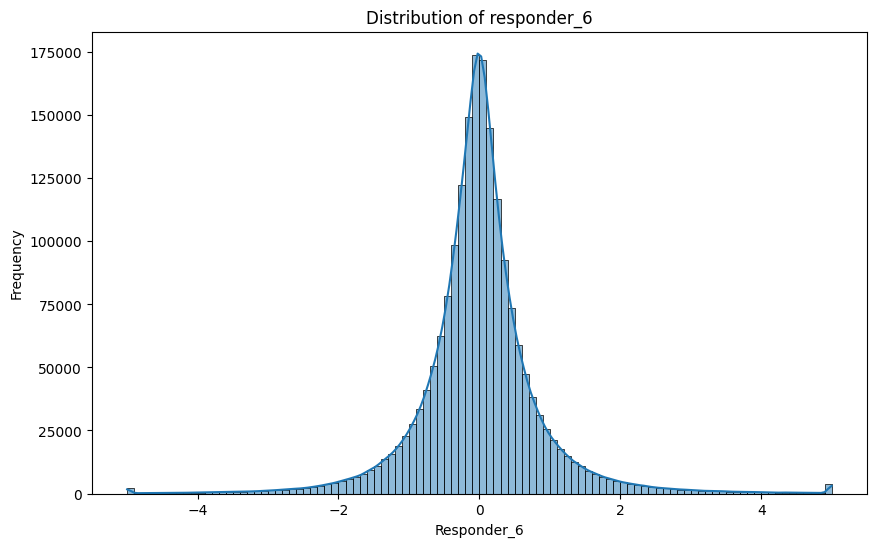

In [63]:
# distribution of responder_6
plt.figure(figsize=(10, 6))
sns.histplot(train_stock['responder_6'], kde=True, bins=100)
plt.title('Distribution of responder_6')
plt.xlabel('Responder_6')
plt.ylabel('Frequency')
plt.show()

In [64]:
# Plotting feature correlations with responder_6
correlations = train_stock.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlations[['responder_6']].sort_values(by='responder_6', ascending=False), cmap='coolwarm', annot=True)
plt.title('Correlation of Features with responder_6')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'sort_values'

<Figure size 1200x800 with 0 Axes>

In [17]:
# Step 4: Feature Engineering
# Creating Lagged Features from lags.parquet
df_lags = pd.read_parquet('lags.parquet')
df_train = df_train.merge(df_lags, on=['date_id', 'symbol_id'], how='left', suffixes=('', '_lag1'))

NameError: name 'df_train' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Dropping columns that will not be used for training
df_train = df_train.drop(columns=['date_id', 'time_id', 'symbol_id'])

# Defining Features and Target
X = df_train.drop(columns=['responder_6'])
y = df_train['responder_6']

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


# We'll start with a simple Ridge Regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

# Step 7: Model Evaluation
# Predicting on the validation set
y_pred = ridge.predict(X_val_scaled)

# Calculating Mean Squared Error (MSE) for evaluation
mse = mean_squared_error(y_val, y_pred)
print(f'Mean Squared Error (MSE) on Validation Set: {mse}')

# Visualizing Predictions
plt.figure(figsize=(10, 6))
plt.plot(y_val.values[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Responder_6')
plt.xlabel('Sample Index')
plt.ylabel('Responder_6 Value')
plt.show()

# Step 8: Next Steps
# - Optimize the model by hyperparameter tuning.
# - Test additional algorithms like Random Forest, Gradient Boosting, and Neural Networks.
# - Handle symbol_id entries that are not consistent across all date_id and time_id.
# - Prepare the prediction pipeline using the provided API for real-time forecasting.

# Let's keep building!
